In [1]:
import os
import subprocess
import seaborn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


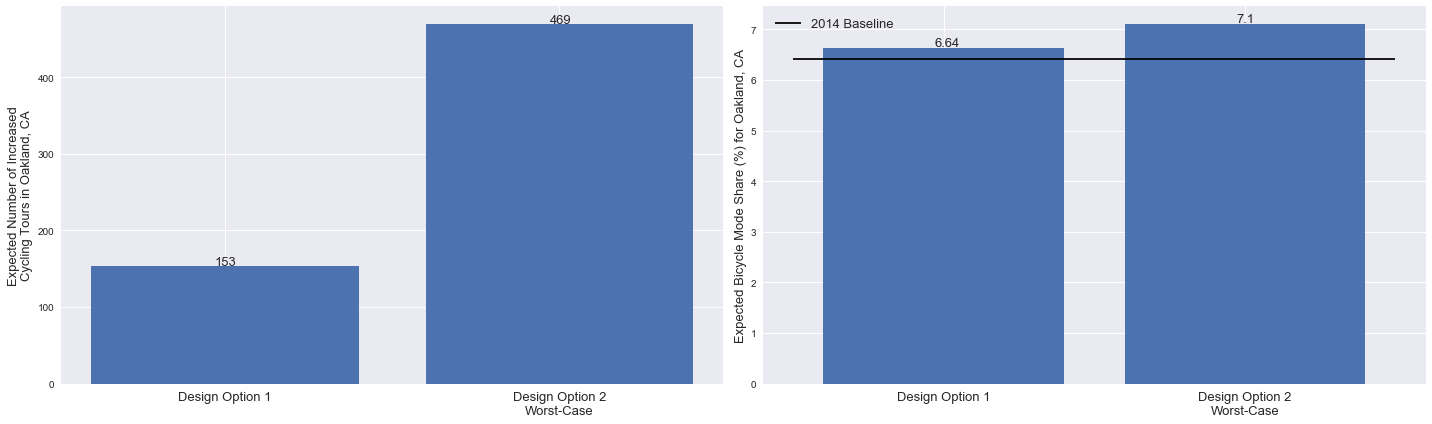

In [2]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 6))

axes[0].bar([0, 1], [153, 469])
axes[0].annotate('153', (-0.03, 155), fontsize=13)
axes[0].annotate('469', (0.97, 471), fontsize=13)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Design Option 1', 'Design Option 2\nWorst-Case'],
                        fontsize=13)
axes[0].set_ylabel('Expected Number of Increased\nCycling Tours in Oakland, CA',
                   fontsize=13)

axes[1].bar([0, 1], [6.64, 7.1])
axes[1].annotate('6.64', (-0.03, 6.66), fontsize=13)
axes[1].annotate('7.1', (0.97, 7.15), fontsize=13)

axes[1].hlines(6.42, -0.5, 1.5, label='2014 Baseline')

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Design Option 1', 'Design Option 2\nWorst-Case'],
                        fontsize=13)
axes[1].set_ylabel('Expected Bicycle Mode Share (%) for Oakland, CA',
                   fontsize=13)
axes[1].legend(loc='best', fontsize=13)

fig.tight_layout()
fig.savefig('./chapter2/images/forecast_results.pdf',
            dpi=500,
            bbox_inches='tight')
fig.show()

# Dissertation compilation

In [3]:
import os
import subprocess

In [4]:
# Create the script to compile the dissertation
def compile_dissertation():
    # Print a beginning message
    print("Beginning dissertation compilation.")
    # Set the current working directory
    dissertation_path = './'
    os.chdir(dissertation_path)

    # Create the subprocess commands
    main_compile_command =\
        ['pdflatex', '--interaction=nonstop', 'dissertation.tex']
    bibtex_dissertation = ['bibtex', 'dissertation.aux']
    build_cmds = [main_compile_command,
                  bibtex_dissertation,
                  ['bibtex', 'chapter1/current/ch1.aux'],
                  ['bibtex', 'chapter2/current/ch2.aux'],
                  ['bibtex', 'chapter3/current/ch3.aux'],
                  ['bibtex', 'chapter4/current/ch4.aux'],
                  ['bibtex', 'chapter5/current/ch5.aux'],
                  main_compile_command,
                  main_compile_command]

    # Execute the commands
    for cmd in build_cmds:
        subprocess.call(cmd,
                        stderr=subprocess.STDOUT)

    # Declare endings and base filepaths for unwanted files
    unwanted_endings =\
        ['.aux', '.lof', '.lot', '.out',
         '.toc', '.bbl', '.blg', '.tex.bak',
         '.bib.bak']
    filepaths = ['dissertation',
                 'abstract/v3/abstract',
                 'chapter1/current/ch1',
                 'chapter2/current/ch2',
                 'chapter3/current/ch3',
                 'chapter4/current/ch4',
                 'chapter5/current/ch5',
                 'conclusion/current/conclusion']

    # Cleanup unwanted files
    for ending in unwanted_endings:
        for path in filepaths:
            unwanted_file = path + '{}'.format(ending)
            if os.path.exists(unwanted_file):
                os.remove(unwanted_file)

    # Print a finished message
    print("Finished compiling dissertation.")
    return

compile_dissertation()

Beginning dissertation compilation.
Finished compiling dissertation.
